In [1]:
!pip install kaggle

import os
os.environ['KAGGLE_USERNAME'] = 'topheron'
os.environ['KAGGLE_KEY'] = '074c53a3bd44271a8f84373bcf6c5a68'

!kaggle datasets download -d aungpyaeap/supermarket-sales


     ---------------------------------------- 63.3/63.3 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=baa9d3c3454889f37c4c5a7356e5b6706102049a17a69f67472c3e70ecd627a5
  Stored in directory: c:\users\chris\appdata\local\pip\cache\wheels\9c\45\15\6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle




  0%|          | 0.00/35.9k [00:00<?, ?B/s]
100%|##########| 35.9k/35.9k [00:00<00:00, 1.48MB/s]


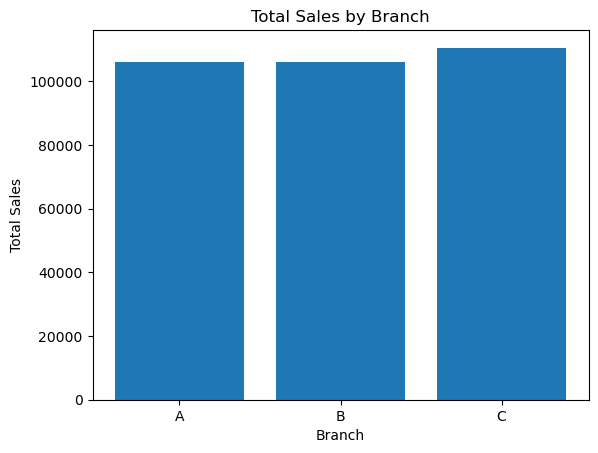

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('supermarket_sales.csv')

# Aggregate the sales by branch
sales_by_branch = df.groupby('Branch')['Total'].sum()

# Create a bar chart
plt.bar(sales_by_branch.index, sales_by_branch.values)
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()


In [34]:
df.head

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle   

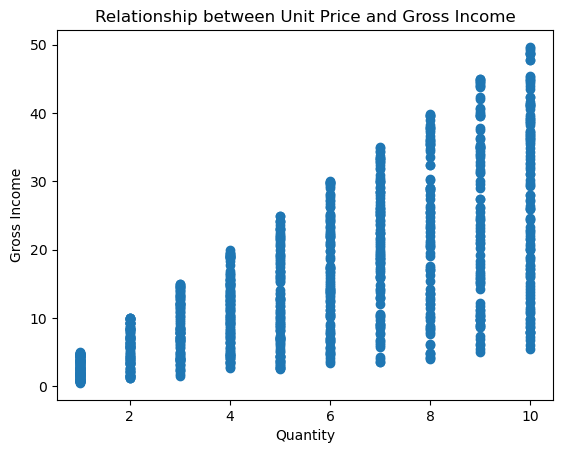

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('supermarket_sales.csv')

# Create a scatter plot
plt.scatter(df['Quantity'], df['gross income'])
plt.title('Relationship between Unit Price and Gross Income')
plt.xlabel('Quantity')
plt.ylabel('Gross Income')
plt.show()


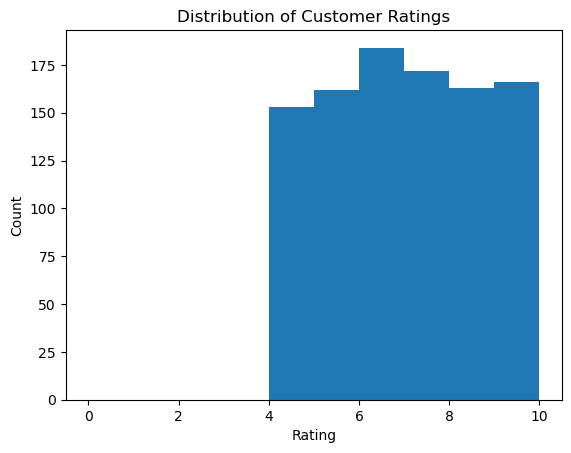

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('supermarket_sales.csv')

# Create a histogram
plt.hist(df['Rating'], bins=10, range=(0, 10))
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


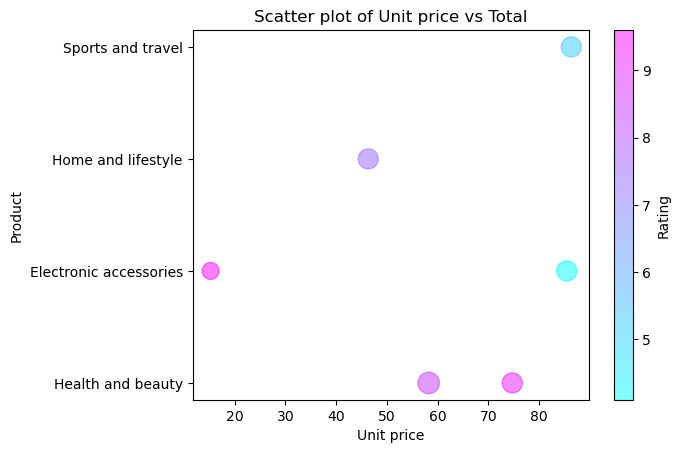

In [14]:
plt.scatter(df['Unit price'], df['Product line'], s=df['Quantity']*30, alpha=0.5, c=df['Rating'], cmap='cool')
plt.xlabel('Unit price')
plt.ylabel('Product')
plt.title('Scatter plot of Unit price vs Total')
plt.colorbar(label='Rating')
plt.show()



In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Select the categorical columns for label encoding
categorical_columns = ['Product line', 'Gender', 'Customer type', 'Payment']

# Perform label encoding on the categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    if column == 'Product line':
        df[column] = label_encoder.fit_transform(df[column].replace('Health and beauty', '1'))
    else:
        df[column] = label_encoder.fit_transform(df[column])

# Print the modified DataFrame with label encoded columns
print(df.head())

# Perform further analysis, data preprocessing, or modeling as needed





    Invoice ID Branch       City  Customer type  Gender  Product line  \
0  750-67-8428      A     Yangon              0       0             0   
1  226-31-3081      C  Naypyitaw              1       0             1   
2  631-41-3108      A     Yangon              1       1             4   
3  123-19-1176      A     Yangon              0       1             0   
4  373-73-7910      A     Yangon              1       1             5   

   Unit price  Quantity   Tax 5%     Total       Date   Time  Payment    cogs  \
0       74.69         7  26.1415  548.9715   1/5/2019  13:08        2  522.83   
1       15.28         5   3.8200   80.2200   3/8/2019  10:29        0   76.40   
2       46.33         7  16.2155  340.5255   3/3/2019  13:23        1  324.31   
3       58.22         8  23.2880  489.0480  1/27/2019  20:33        2  465.76   
4       86.31         7  30.2085  634.3785   2/8/2019  10:37        2  604.17   

   gross margin percentage  gross income  Rating  
0                 4.761

In [25]:
# Drop the 'Branch' column
df.drop('Time', axis=1, inplace=True)


In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)



C:\Users\chris\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


In [28]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

estimator = RandomForestClassifier()  # Use the desired classifier
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5))
X_selected = rfecv.fit_transform(X, y)


In [29]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)


SVC()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [32]:
pip install tensorflow

     ------------------------------------- 272.8/272.8 MB 14.5 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 84.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 92.3 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 87.2 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ------------------------------------- 440.7/440.7 kB 26.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     --------------------------------------- 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1]))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)


ModuleNotFoundError: No module named 'tensorflow'

In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Select the features and target variable
X = df.drop(['Invoice ID', 'Product line'], axis=1)  # Drop irrelevant columns
X_encoded = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical columns
y = (df['Product line'] == 'Health and beauty').astype(int)  # Create binary target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the results
print("Product Line Prediction - Accuracy:", accuracy)
print("Product Line Prediction - Classification Report:")
print(classification_report)


Product Line Prediction - Accuracy: 0.83
Product Line Prediction - Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       165
           1       1.00      0.03      0.06        35

    accuracy                           0.83       200
   macro avg       0.91      0.51      0.48       200
weighted avg       0.86      0.83      0.76       200



C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select the relevant columns for the model
columns = ['Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
X = df[columns]
y = df['Unit price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Use the trained model to predict the unit price for the entire dataset
predicted_unit_price = model.predict(X)

# Filter the predicted unit prices based on desired Health and Beauty purchases
health_beauty_unit_price = predicted_unit_price[df['Product line'] == 'Health and beauty']

# Analyze and optimize the filtered unit prices to increase Health and Beauty purchases
# ...



In [44]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select the relevant columns for the model
columns = ['Gender', 'Customer type', 'Payment', 'gross income']
X = df[columns]
y = df['Product line']

# Perform one-hot encoding on the categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)



Accuracy: 0.15
Classification Report:
                        precision    recall  f1-score   support

Electronic accessories       0.20      0.29      0.24        38
   Fashion accessories       0.29      0.11      0.15        38
    Food and beverages       0.10      0.24      0.14        25
     Health and beauty       0.00      0.00      0.00        35
    Home and lifestyle       0.12      0.15      0.13        34
     Sports and travel       0.12      0.13      0.13        30

              accuracy                           0.15       200
             macro avg       0.14      0.15      0.13       200
          weighted avg       0.14      0.15      0.13       200



C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chris\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
df.head

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle   

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('supermarket_sales.csv'

<bound method NDFrame.head of      Customer type  Gender  Product line  Unit price  Quantity   Tax 5%  \
0                1       2             1       74.69         7  26.1415   
1                2       2             0       15.28         5   3.8200   
2                2       1             0       46.33         7  16.2155   
3                1       1             1       58.22         8  23.2880   
4                2       1             0       86.31         7  30.2085   
..             ...     ...           ...         ...       ...      ...   
995              2       1             1       40.35         1   2.0175   
996              2       2             0       97.38        10  48.6900   
997              1       1             0       31.84         1   1.5920   
998              2       1             0       65.82         1   3.2910   
999              1       2             0       88.34         7  30.9190   

         Total  gross income  Rating  
0     548.9715       26.1415  

In [47]:
df

,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,gross income,Rating
0,1,2,1,74.69,7,26.1415,548.9715,26.1415,9.1
1,2,2,0,15.28,5,3.8200,80.2200,3.8200,9.6
2,2,1,0,46.33,7,16.2155,340.5255,16.2155,7.4
3,1,1,1,58.22,8,23.2880,489.0480,23.2880,8.4
4,2,1,0,86.31,7,30.2085,634.3785,30.2085,5.3
...,...,...,...,...,...,...,...,...,...
995,2,1,1,40.35,1,2.0175,42.3675,2.0175,6.2
996,2,2,0,97.38,10,48.6900,1022.4900,48.6900,4.4
997,1,1,0,31.84,1,1.5920,33.4320,1.5920,7.7
998,2,1,0,65.82,1,3.2910,69.1110,3.2910,4.1


In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select the features and target variable
X = df.drop('Product line', axis=1)
y = df['Product line']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90       165
           1       0.00      0.00      0.00        35

    accuracy                           0.81       200
   macro avg       0.41      0.49      0.45       200
weighted avg       0.68      0.81      0.74       200



In [51]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features and target variable
X = df.drop(['Product line', 'Unit price'], axis=1)
y = df['Unit price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)


Mean Squared Error: 2.1103416116500138


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select the relevant columns for training
columns = ['Customer type', 'Gender', 'Quantity', 'Tax 5%', 'Total', 'gross income', 'Rating']
X = df[columns]
y = df['Unit price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 2.2220325082500083


In [60]:
# Use the trained model to predict the unit price for the entire dataset
predicted_unit_price = model.predict(X)

# Add the predicted unit price to the dataset
df['Predicted Unit Price'] = predicted_unit_price

# Print the updated dataset with the predicted unit price
print(df)

     Customer type  Gender  Product line  Unit price  Quantity   Tax 5%  \
0                1       2             1       74.69         7  26.1415   
1                2       2             0       15.28         5   3.8200   
2                2       1             0       46.33         7  16.2155   
3                1       1             1       58.22         8  23.2880   
4                2       1             0       86.31         7  30.2085   
..             ...     ...           ...         ...       ...      ...   
995              2       1             1       40.35         1   2.0175   
996              2       2             0       97.38        10  48.6900   
997              1       1             0       31.84         1   1.5920   
998              2       1             0       65.82         1   3.2910   
999              1       2             0       88.34         7  30.9190   

         Total  gross income  Rating  Predicted Unit Price  
0     548.9715       26.1415     9.1  

In [61]:
df

,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,gross income,Rating,Predicted Unit Price
0,1,2,1,74.69,7,26.1415,548.9715,26.1415,9.1,74.5191
1,2,2,0,15.28,5,3.8200,80.2200,3.8200,9.6,14.8460
2,2,1,0,46.33,7,16.2155,340.5255,16.2155,7.4,46.3582
3,1,1,1,58.22,8,23.2880,489.0480,23.2880,8.4,58.0709
4,2,1,0,86.31,7,30.2085,634.3785,30.2085,5.3,86.3027
...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,40.35,1,2.0175,42.3675,2.0175,6.2,39.3659
996,2,2,0,97.38,10,48.6900,1022.4900,48.6900,4.4,96.9731
997,1,1,0,31.84,1,1.5920,33.4320,1.5920,7.7,31.4814
998,2,1,0,65.82,1,3.2910,69.1110,3.2910,4.1,65.6730


In [53]:
# Filter the DataFrame to include only rows where Product line is 1
product_line_1 = df[df['Product line'] == 1]

# Calculate the average quantity
average_quantity = product_line_1['Quantity'].mean()

print("Average Quantity of Product Line 1:", average_quantity)


Average Quantity of Product Line 1: 5.618421052631579


In [62]:
import numpy as np

# Filter the dataset for product line value 1
product_line_1_data = df[df['Product line'] == 1]

# Calculate the average unit price for product line value 1 based on quantity
average_unit_price = np.mean(product_line_1_data['Unit price'])

# Print the average unit price
print("Average Unit Price for Product Line 1:", average_unit_price)


Average Unit Price for Product Line 1: 54.85447368421053


In [3]:
import pandas as pd
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df

,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,gross income,Rating
0,1,2,1,74.69,7,26.1415,548.9715,26.1415,9.1
1,2,2,0,15.28,5,3.8200,80.2200,3.8200,9.6
2,2,1,0,46.33,7,16.2155,340.5255,16.2155,7.4
3,1,1,1,58.22,8,23.2880,489.0480,23.2880,8.4
4,2,1,0,86.31,7,30.2085,634.3785,30.2085,5.3
...,...,...,...,...,...,...,...,...,...
995,2,1,1,40.35,1,2.0175,42.3675,2.0175,6.2
996,2,2,0,97.38,10,48.6900,1022.4900,48.6900,4.4
997,1,1,0,31.84,1,1.5920,33.4320,1.5920,7.7
998,2,1,0,65.82,1,3.2910,69.1110,3.2910,4.1


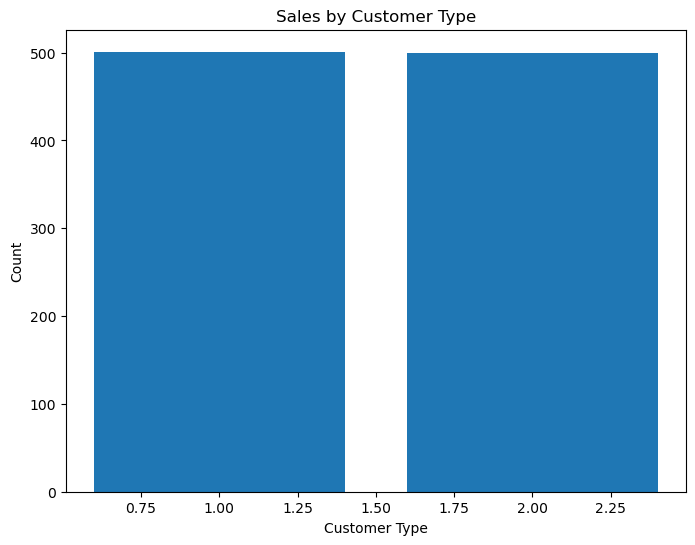

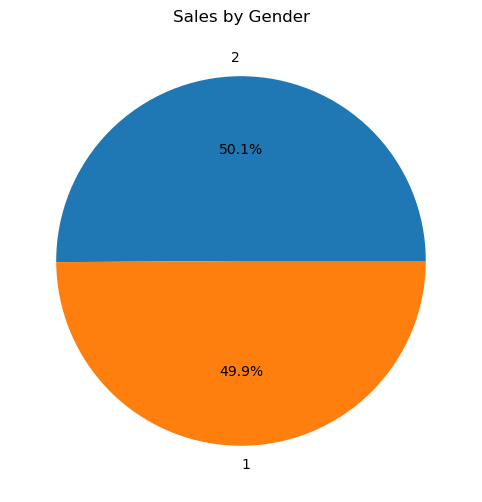

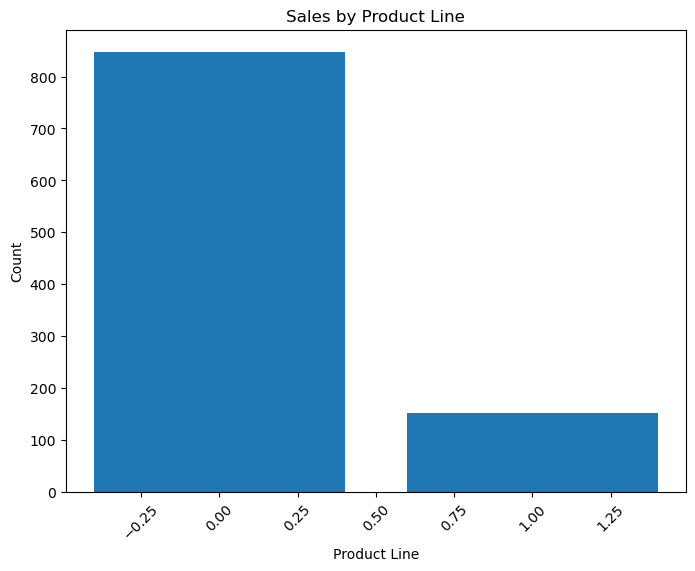

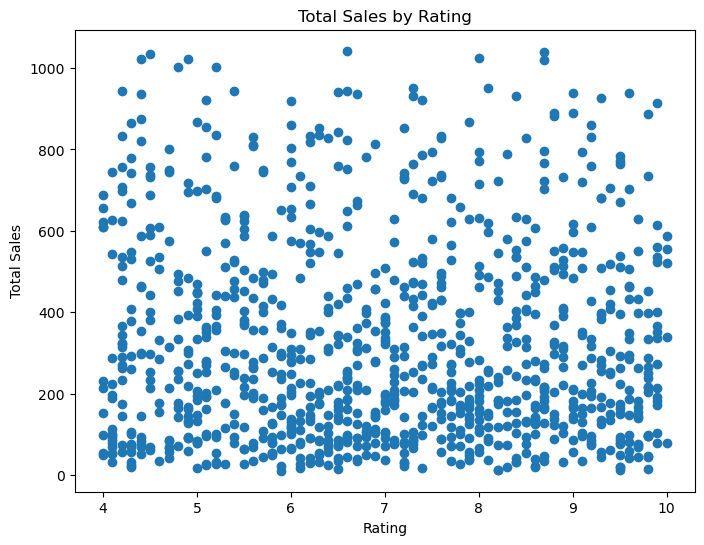

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Visualize sales by customer type
customer_type_counts = df['Customer type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(customer_type_counts.index, customer_type_counts.values)
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Sales by Customer Type')
plt.show()

# Visualize sales by gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Sales by Gender')
plt.show()

# Visualize sales by product line
product_line_counts = df['Product line'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(product_line_counts.index, product_line_counts.values)
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Sales by Product Line')
plt.xticks(rotation=45)
plt.show()

# Visualize total sales by rating
plt.figure(figsize=(8, 6))
plt.scatter(df['Rating'], df['Total'])
plt.xlabel('Rating')
plt.ylabel('Total Sales')
plt.title('Total Sales by Rating')
plt.show()


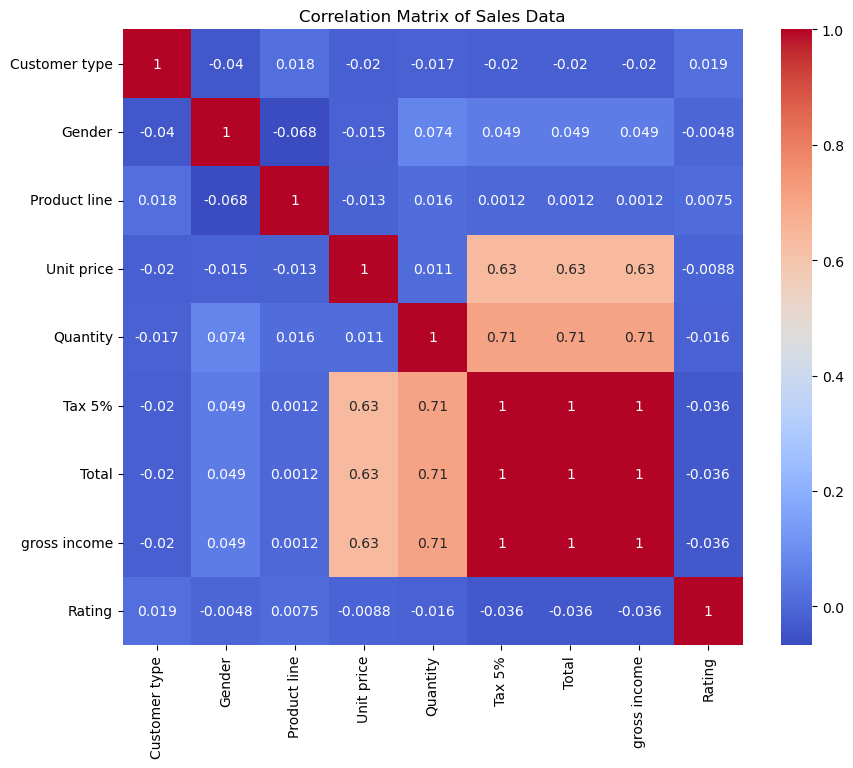

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sales Data')
plt.show()
